In [1]:
from IPython.display import clear_output
import time
from colorama import Fore
import pandas as pd
from random import randint
import random
import matplotlib.pyplot as plt
import matplotlib
from collections import Counter
import numpy as np
import sys
%matplotlib inline

In [2]:
def showHead():
    S='\033[1m'+'\033[4m'+"Welcome to the Movie Guessing Game - BOLLY-WOOD"+'\033[0m'
    print('='.center(98,'='))
    print(S.center(110,'*'))
    print('='.center(98,'='))
    print("\n"+'\033[1m'+"Overview : "+'\033[0m')
    print("This game is similar to the traditional game 'Bollywood' we play with our friends, in which one\t  player thinks of a movie and only shows the vowels. Other player has to guess the movie in the\t  given chances.")
    print("\n"+'\033[1m'+"Rules : "+'\033[0m')
    print("1. A player will get 10 wrong chances as in string 'Bolly-wood' to guess the movie.")
    print("2. If a vowel is entered then an error will be printed.")
    print("3. A letter can be entered only once, if you enter it a second time then an error will be printed")
    print("4. Also you will save a chance if you enter a wrong letter and the next letter to be cut from\t\tBolly-wood string is same.")
    print("5. When your wrong letters count reach '-' of Bolly-wood a hint will be provided to help you.")
    print("\n"+'\033[1m'+"Working : "+'\033[0m')
    print("1. Game has 2 modes : Multiplayer and Single player\n\tA) In Myultiplayer mode the user will get an option to enter a movie and hint\n\tB) In Sinble Player mode a random movie from a txt file will be picked")
    print("2. Then player can start guessing the movie by entering a letter at a time. If the guess is - \n\tA) correct, message 'Nice Guess' will be printed\n\tB) wrong, message 'Wrong Guess' will be printed")
    print("3. If the player is not able to guess the movie then the movie will be revealed to the player")
    print("4. In the end a pie chart analyzing the accuracy of player, a bar graph of number of vowels and     consonants in the movie and a frequency graph of all the letters in the movie name will be shown")
    print("\n"+'\033[1m'+"Let's Get Started!!!"+'\033[0m')

In [3]:
def selectMovie(c):
    file=open('FinalMovies.txt','r')
    list1=file.readlines()
    if c==1:
        x=random.randint(0,3)
    elif c==2:
        x=random.randint(4,7)
    else:
        x=random.randint(8,11)
    line=list1[x]
    movie=line.split(' Hint :')[0]
    hint=line.split(' Hint :')[1]
    return movie,hint

In [4]:
def clearOutput():
    print('Now the Movie name and Hint will be erased and player 2 can start guessing the Movie')
    t=time.time()+7
    while time.time()<t:
        continue
    clear_output()

In [5]:
def checkLose(check,Movie_st):
    if check==10:
        print("\nYou didn't Guess the movie in the given chances.\n")
        print("The movie was",Movie_st,"\nYou Lose! Good Luck next time.")

In [6]:
class Movie:
    def __init__(self,mov,hin):
        self.Movie_st=mov.upper()
        self.Movie_name=list(self.Movie_st)
        self.Movie_out=[]
        self.movieOut()
        self.Movie_check=[]
        self.movieCheck()
        self.Hint=hin
        
    def movieOut(self):
        for i in self.Movie_name:
            if i=='A' or i=='E' or i=='I' or i=='O' or i=='U' :
                self.Movie_out.append(i)
            elif i==" ":
                self.Movie_out.append('/')
            else:
                self.Movie_out.append('-')
                
    def movieCheck(self):
        for i in self.Movie_name:
            if i==" ":
                self.Movie_check.append('/')
            else:
                self.Movie_check.append(i)
                
    def moviePrint(self):
        for i in self.Movie_out:
            print(i,end='')
            
    def printHint(self,check,c):
        if check==6 and c==1:
            print("\nHint : ",self.Hint)
            return 0
        else:
            return c
            
    def movieUpdate(self,letter):
        ch=0
        for i in range(0,len(self.Movie_name)):
            if letter==self.Movie_name[i]:
                self.Movie_out[i]=letter
            else:
                ch=ch+1
        return ch
    
    def checkGuessMovie(self,check):
        if self.Movie_out==self.Movie_check:
            print("Great You Guessed the Movie.")
            print(self.Movie_st)
            return 11
        else:
            return check

In [7]:
class Bollywood:
    def __init__(self):
        self.S='BOLLY-WOOD'
        self.C='----------'
        self.list_bolly=list(self.S)
        self.list_change=self.list_bolly[:]
        self.setInitial()
        self.list_out=list(self.C)
        
    def setInitial(self):
        for i in range(0,10):
            self.list_bolly[i]=Fore.GREEN+self.list_bolly[i]+Fore.RESET
            
    def showBolly(self):
        print('{0:25}'.format("Checking - "),end='')
        for i in range(0,10):
            print(self.list_bolly[i],"  ",end='')
        print()
        print('{0:25}'.format('Wrong letters guessed - '),end='')
        for i in range(0,10):
            print(self.list_out[i],'  ',end='')
        print("\n")
        
    def showGuess(self,ch,s,check,right,wrong):
        if ch==len(s):
            print("Wrong Letter Guessed :(\n")
            self.list_bolly[check]=Fore.RED + self.list_change[check] +Fore.RESET
            self.list_out[check]=Fore.BLUE+letter+Fore.RESET
            return check+1,right,wrong+1
        else:
            print("Nice Guess :)\n")
            return check,right+1,wrong
        
    def checkSameLetter(self,ch,s,letter,check):
        if self.list_change[check]==letter and ch==len(s):
            print("Same letters can't be cut. Good Call! Saved Yourself a Chance\n")
            return True
        else:
            return False

In [8]:
class CheckLetter:
    def __init__(self):
        self.letters=[]
        self.vowels=['A','I','E','O','U']
        
    def checkVowel(self,letter):
        if letter in self.vowels:
            print("Entered letter is a vowel. Please enter another letter.\n")
            return True
        else:
            return False
        
    def checkEnteredBefore(self,letter):
        if letter in self.letters:
            print("Already entered the letter. Please enter a new letter.\n")
            return True
        else:
            self.letters.append(letter)
            return False

In [9]:
def vizShowGuessPie(c,w):
    Accu=format((c/(c+w))*100,'.2f')
    S='Your Accuracy is '+str(Accu)+'%'
    labels=['Right guesses','Wrong guesses']
    sizes=[c,w]
    colors=['lightgreen','red']
    explodeTuple=(0,0.1)
    plt.pie(sizes,labels=labels,colors=colors,explode=explodeTuple,wedgeprops={'linewidth':0.5,'edgecolor':"black"},shadow=True,autopct='%1.1f%%',startangle=90)
    plt.axis('equal')
    plt.title(S)
    plt.show()

In [10]:
def vcFrequencyGraph(movie):
    print("\nFrequency graph of Vowels and Consonants occuring in the Movie\n\n")
    s=movie
    vowels=0
    consonants=0
    for i in range(0,len(s)):
        ch=s[i]
        if(ch=='a' or ch=='A' or ch=='e' or ch=='E' or ch=='i' or ch=='I' or ch=='o' or ch=='O' or ch=='u' or ch=='U'):
            vowels=vowels+1
        else:
            consonants=consonants+1
    data=[[vowels],[consonants]]
    df=pd.DataFrame(data,index=['Vowels','Consonants'],columns=['Frequency'])
    legend=['Vowels','Consonants']
    matplotlib.style.use('Solarize_Light2')
    df.plot.bar(fontsize=12,figsize=(10,6),width=0.20,edgecolor='black',linewidth=3,color='red')

In [11]:
def letterFreqGraph(St):
    s=St
    list1=list(s)
    s2=""
    for i in list1:
        if i==" ":
            continue
        else:
            s2=s2+i
    res=Counter(s2)
    plt.xlabel('Letters',fontsize=12)
    plt.ylabel('Frequency',fontsize=12)
    plt.title('Frequency of letters appearing in the movie.',fontsize=12)
    plt.yticks(range(0,50))
    matplotlib.style.use('seaborn-pastel')
    plt.bar(*zip(*res.most_common()), width=.5,color='lightgreen',edgecolor='black',linewidth=3)

In [12]:
showHead()
print()
choice=int(input("Play game in Single Player Mode(1) or Multiplayer Mode(2)? "))
if choice==1:
    print("Select Level : \n1. Easy\n2. Medium\n3. Hard")
    cho=int(input('Choice : '))
    Movie_st,Hint=selectMovie(cho)
    ob_movie=Movie(Movie_st,Hint)
    
elif choice==2:
    Movie_st=input('Enter Movie Name : ')
    Hint=input('Enter a Hint : ')
    ob_movie=Movie(Movie_st,Hint)
    clearOutput()
    
else:
    print("Entered Wrong Choice")
    sys.exit()

ob_bolly=Bollywood()
ob_check=CheckLetter()
check=0
c=1
wrong=0
right=0
while check<10:
    ob_bolly.showBolly()
    c=ob_movie.printHint(check,c)
    ob_movie.moviePrint()
    
    letter=input('\nGuess a letter - ')
    letter=letter.upper()
    
    if ob_check.checkVowel(letter):
        continue
        
    if ob_check.checkEnteredBefore(letter):
        continue
        
    ch=ob_movie.movieUpdate(letter)
    if ob_bolly.checkSameLetter(ch,ob_movie.Movie_name,letter,check):
        continue
    check,right,wrong=ob_bolly.showGuess(ch,ob_movie.Movie_name,check,right,wrong)
    check=ob_movie.checkGuessMovie(check)

checkLose(check,Movie_st11)

*************************Welcome to the Movie Guessing Game - BOLLY-WOOD**************************

Overview : 
This game is similar to the traditional game 'Bollywood' we play with our friends, in which one	  player thinks of a movie and only shows the vowels. Other player has to guess the movie in the	  given chances.

Rules : 
1. A player will get 10 wrong chances as in string 'Bolly-wood' to guess the movie.
2. If a vowel is entered then an error will be printed.
3. A letter can be entered only once, if you enter it a second time then an error will be printed
4. Also you will save a chance if you enter a wrong letter and the next letter to be cut from		Bolly-wood string is same.
5. When your wrong letters count reach '-' of Bolly-wood a hint will be provided to help you.

Working : 
1. Game has 2 modes : Multiplayer and Single player
	A) In Myultiplayer mode the user will get an option to enter a movie and hint
	B) In Sinble Player mode a random movie from a txt file will be picked


Analysis Report



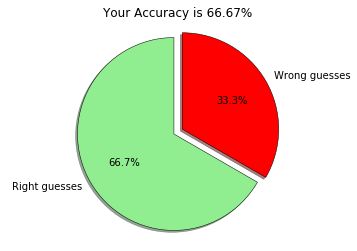

In [13]:
print("\n"+'\033[1m'+'\033[4m'+"Analysis Report"+'\033[0m'+"\n")
vizShowGuessPie(right,wrong)


Frequency graph of Vowels and Consonants occuring in the Movie




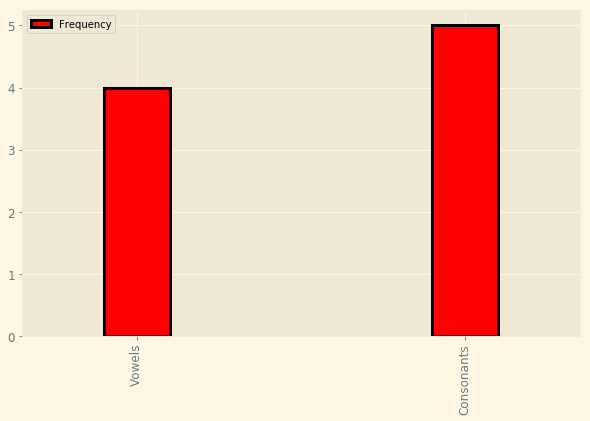

In [14]:
vcFrequencyGraph(ob_movie.Movie_st)

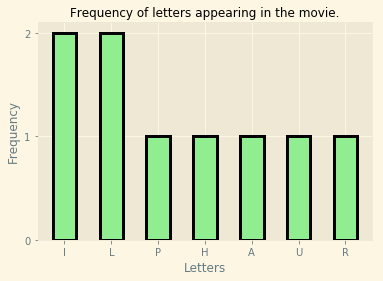

In [15]:
letterFreqGraph(ob_movie.Movie_st)